<a href="https://colab.research.google.com/github/guilhermelaviola/FantasySoccer/blob/main/YugoslaviaNTStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = 'whitegrid')

In [16]:
# Importing the dataset:
former_countries = pd.ExcelFile('former-countries.xlsx')
ys = pd.read_excel(former_countries, 'Yugoslavia')

# Displaying the last 5 row:
ys.tail()

,Number,Position,Player,Date of birth,Matches,Goals,Club,Club country,Captain?,Nationality
311,NaN,FW,Ermal Krasniqi,1998-09-07,8,2,Sparta Prague,Czech,No,Kosovo
312,NaN,FW,Emir Sahiti,1998-11-29,5,1,Hamburger SV,Germany,No,Kosovo
313,NaN,FW,Eliot Bujupi,2006-07-03,1,0,VfB Stuttgart,Germany,No,Kosovo
314,NaN,FW,Shkelqim Vladi,2000-09-21,0,0,Lugano,Switzerland,No,Kosovo
315,NaN,FW,Elbasan Rashani,1993-05-09,29,5,Elche,Spain,No,Kosovo


In [17]:
# Displaying the number of rows and columns in the dataset:
ys.shape

(316, 10)

In [18]:
# Displaying the datatypes presented in the columns:
ys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Number         156 non-null    float64       
 1   Position       316 non-null    object        
 2   Player         316 non-null    object        
 3   Date of birth  316 non-null    datetime64[ns]
 4   Matches        316 non-null    int64         
 5   Goals          316 non-null    int64         
 6   Club           316 non-null    object        
 7   Club country   316 non-null    object        
 8   Captain?       316 non-null    object        
 9   Nationality    316 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 24.8+ KB


In [19]:
# Displaying general statistical information of the number data present in the dataset:
ys.describe()

,Number,Date of birth,Matches,Goals
count,156.000000,316,316.000000,316.000000
mean,12.019231,1998-02-21 15:06:50.126582272,20.629747,2.256329
min,1.000000,1985-09-09 00:00:00,0.000000,0.000000
25%,6.000000,1995-02-20 12:00:00,2.000000,0.000000
50%,12.000000,1998-05-04 00:00:00,9.000000,0.000000
75%,18.000000,2001-01-22 18:00:00,32.000000,1.000000
max,23.000000,2007-06-05 00:00:00,184.000000,67.000000
std,6.670562,NaN,26.394064,6.871205


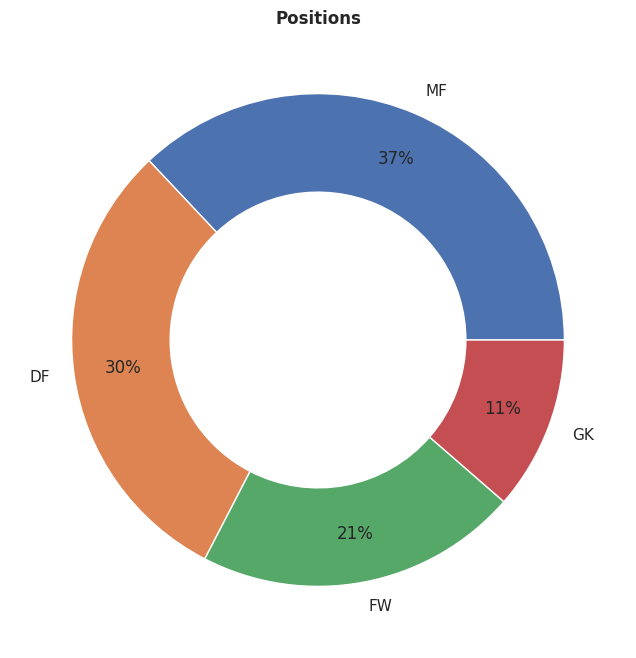

In [20]:
# Displaying the player's positions:
ys['Position'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Positions', fontweight = 'bold')
plt.show()

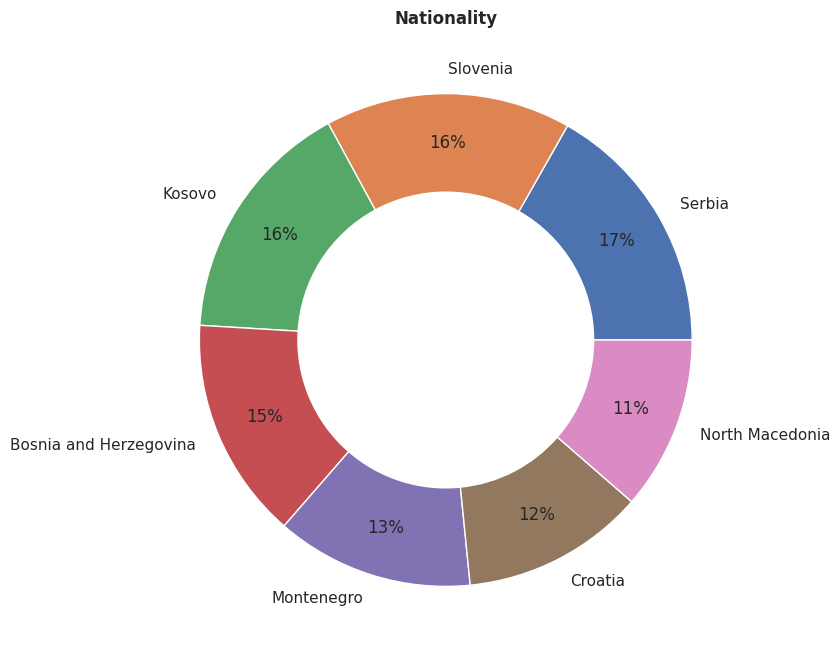

In [21]:
# Displaying the player's nationalities:
ys['Nationality'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Nationality', fontweight = 'bold')
plt.show()

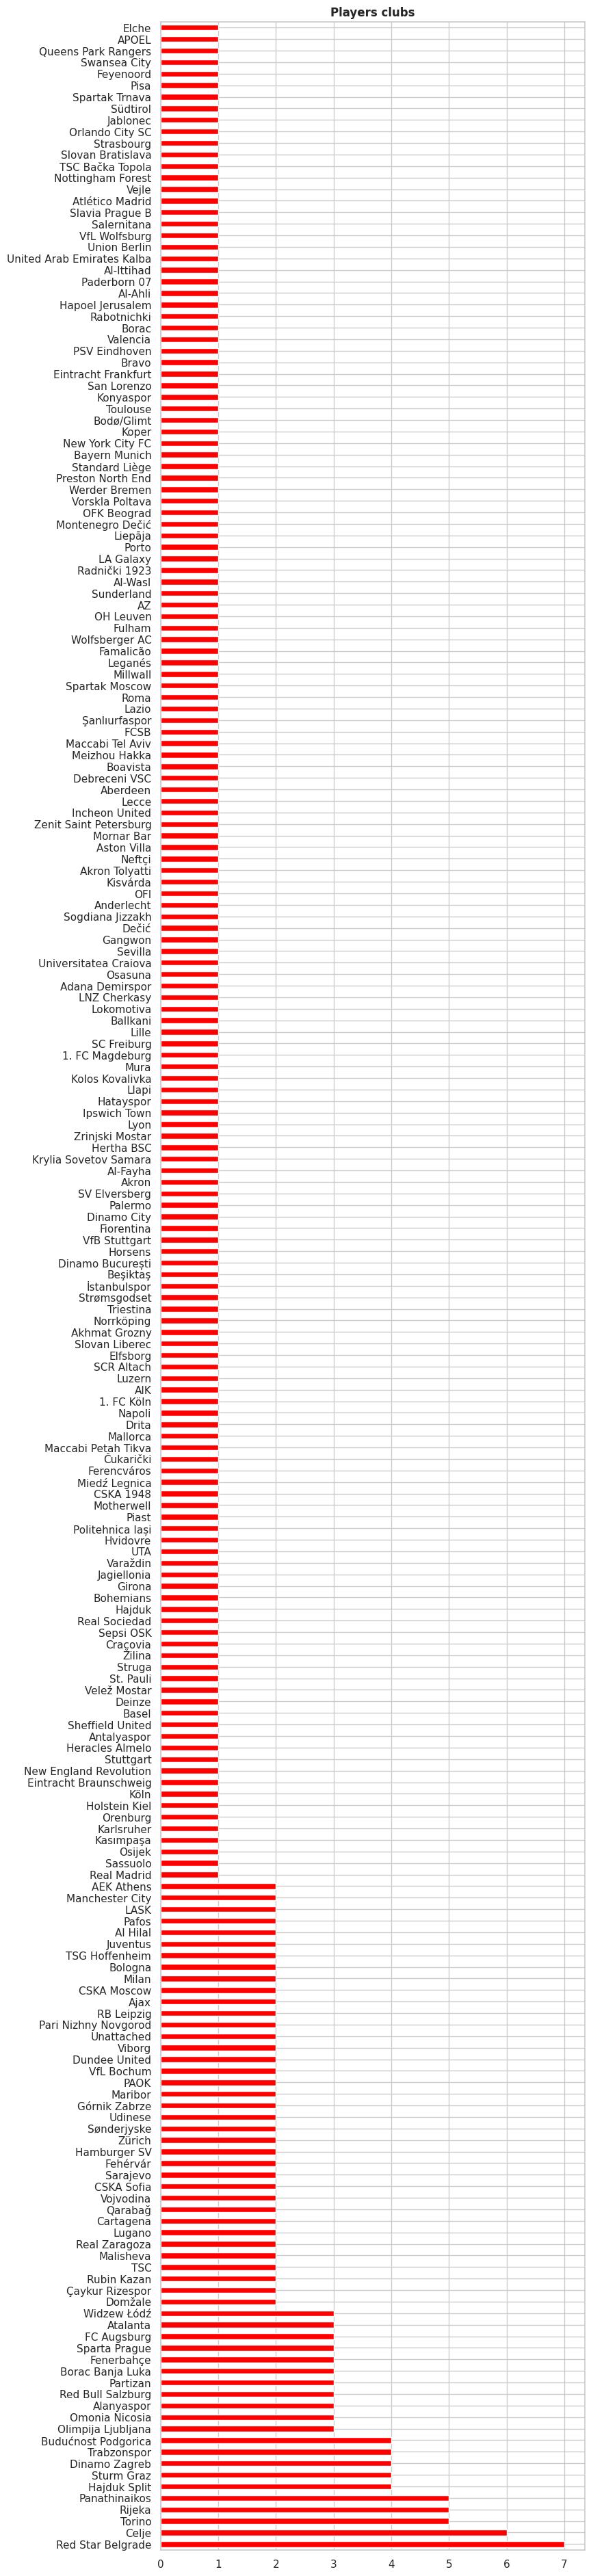

In [22]:
# Displaying the player's clubs:
ys['Club'].value_counts().plot(kind = 'barh', color = 'red', figsize = (8, 48))
plt.ylabel(None)
plt.title('Players clubs', fontweight = 'bold')
plt.show()

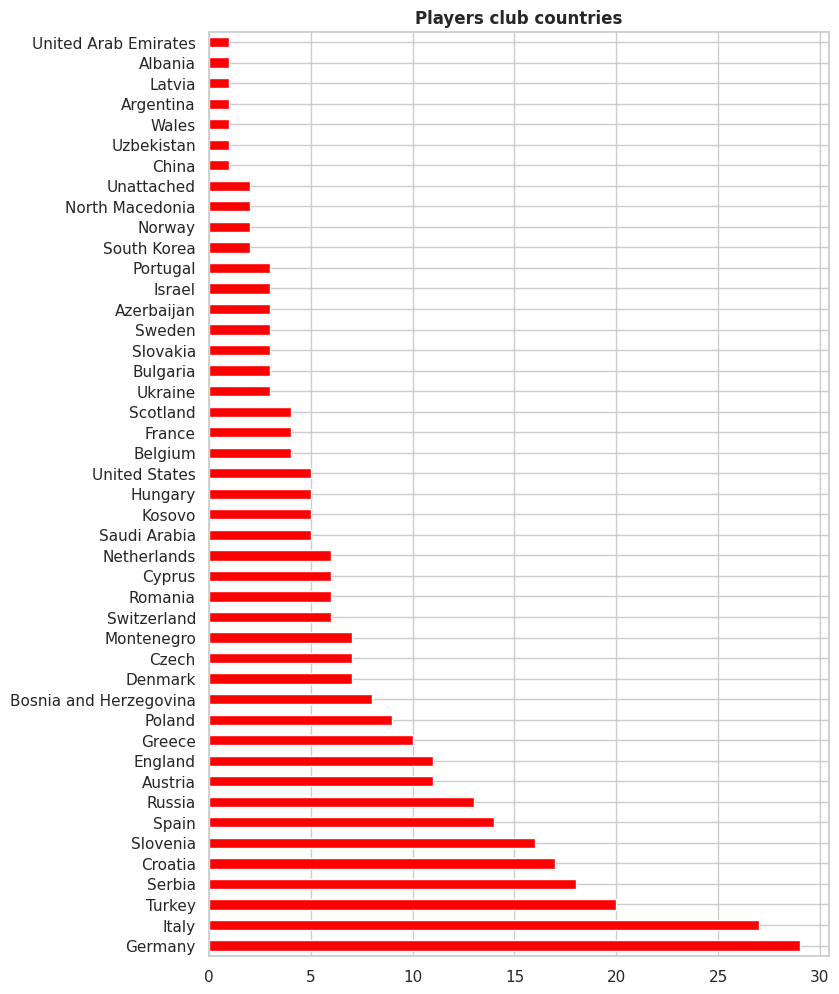

In [23]:
# Displaying the countries of the clubs the players defend:
ys['Club country'].value_counts().plot(kind = 'barh', color = 'red', figsize = (8, 12))
plt.ylabel(None)
plt.title('Players club countries', fontweight = 'bold')
plt.show()

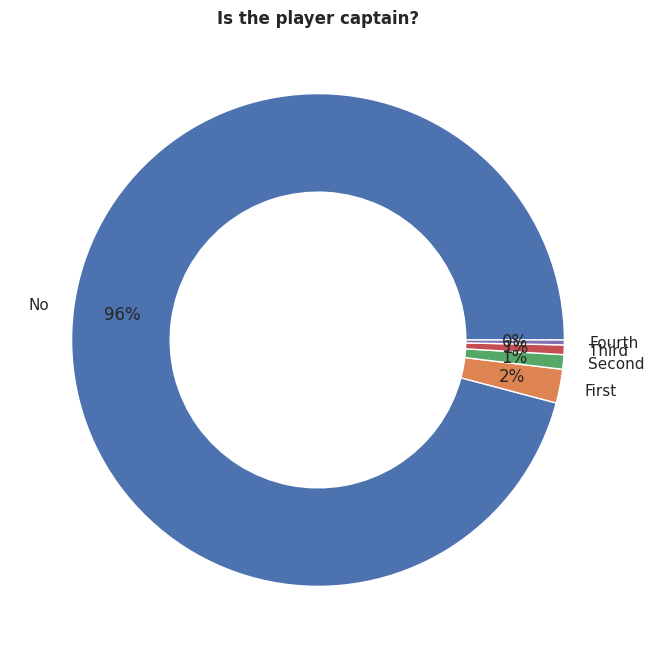

In [24]:
# Displaying if the player is captain of not:
ys['Captain?'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Is the player captain?', fontweight = 'bold')
plt.show()

In [33]:
# Checking the level of matches played by the players:
def matches_count(row):
  num_of_matches = row['Matches']
  if num_of_matches >= 25 and num_of_matches < 50:
    result = 'Over 25 matches played'
  elif num_of_matches >= 50 and num_of_matches < 100:
    result = 'Over 50 matches played'
  elif num_of_matches >= 100 and num_of_matches < 120:
    result = 'Over 100 matches played'
  elif num_of_matches >= 120:
    result = 'Over 120 matches played'
  else:
    result = 'Less than 20 matches played'
  return result

# Applying the function above on a column of the dataset and generating a new column as result:
ys['Matches count'] = ys.apply(matches_count, axis=1)
ys.head()

,Number,Position,Player,Date of birth,Matches,Goals,Club,Club country,Captain?,Nationality,Matches count
0,1.0,GK,Dominik Livaković,1995-01-09,62,0,Fenerbahçe,Turkey,No,Croatia,Over 50 matches played
1,12.0,GK,Dominik Kotarski,2000-02-10,2,0,PAOK,Greece,No,Croatia,Less than 20 matches played
2,23.0,GK,Ivica Ivušić,1995-02-01,6,0,Pafos,Cyprus,No,Croatia,Less than 20 matches played
3,NaN,GK,Nediljko Labrović,1999-10-10,2,0,FC Augsburg,Germany,No,Croatia,Less than 20 matches played
4,3.0,DF,Marin Pongračić,1997-09-11,11,0,Fiorentina,Italy,No,Croatia,Less than 20 matches played


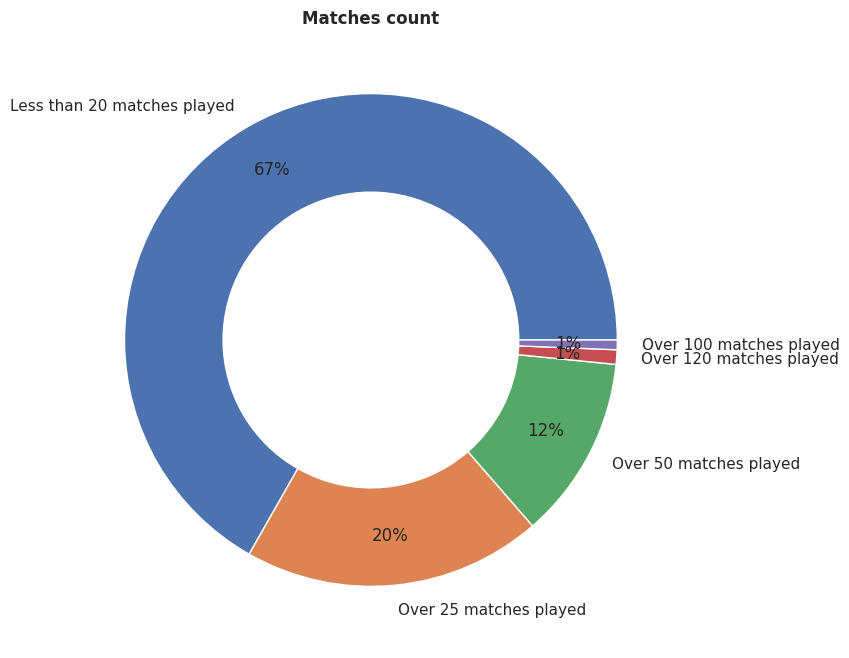

In [34]:
# Displaying the matches count result:
ys['Matches count'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Matches count', fontweight = 'bold')
plt.show()

In [35]:
# Checking the level of goals scored by the players:
def goals_count(row):
  num_of_goals = row['Matches']
  if num_of_goals >= 5 and num_of_goals < 10:
    result = 'Over 5 goals scored'
  elif num_of_goals >= 10 and num_of_goals < 20:
    result = 'Over 10 goals scored'
  elif num_of_goals >= 20 and num_of_goals < 40:
    result = 'Over 20 goals scored'
  elif num_of_goals >= 40:
    result = 'Over 40 goals scored'
  else:
    result = 'Less than 5 goals scored'
  return result

# Applying the function above on a column of the dataset and generating a new column as result:
ys['Goal count'] = ys.apply(goals_count, axis=1)
ys.head()

,Number,Position,Player,Date of birth,Matches,Goals,Club,Club country,Captain?,Nationality,Matches count,Goal count
0,1.0,GK,Dominik Livaković,1995-01-09,62,0,Fenerbahçe,Turkey,No,Croatia,Over 50 matches played,Over 40 goals scored
1,12.0,GK,Dominik Kotarski,2000-02-10,2,0,PAOK,Greece,No,Croatia,Less than 20 matches played,Less than 5 goals scored
2,23.0,GK,Ivica Ivušić,1995-02-01,6,0,Pafos,Cyprus,No,Croatia,Less than 20 matches played,Over 5 goals scored
3,NaN,GK,Nediljko Labrović,1999-10-10,2,0,FC Augsburg,Germany,No,Croatia,Less than 20 matches played,Less than 5 goals scored
4,3.0,DF,Marin Pongračić,1997-09-11,11,0,Fiorentina,Italy,No,Croatia,Less than 20 matches played,Over 10 goals scored


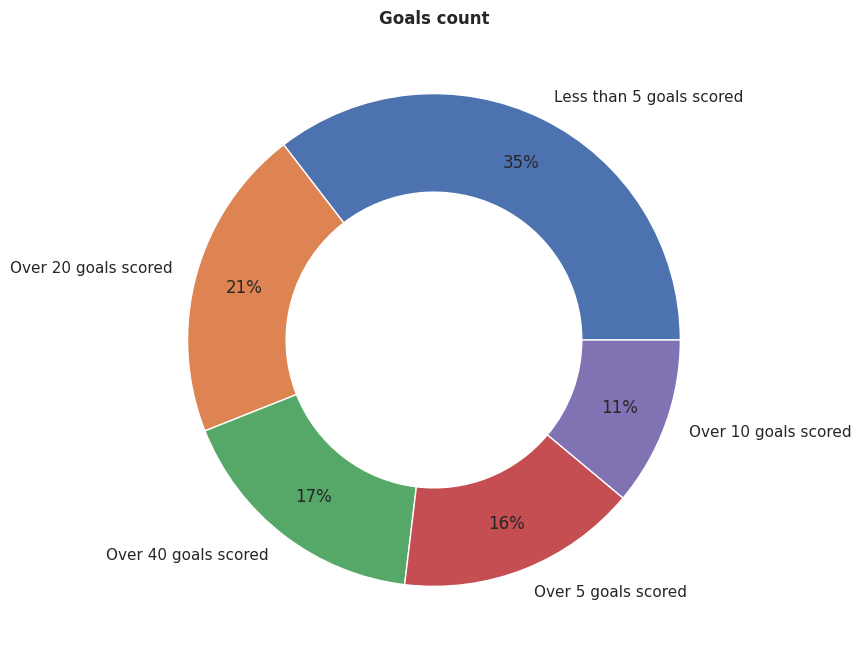

In [36]:
# Displaying the goals count result:
ys['Goal count'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Goals count', fontweight = 'bold')
plt.show()